In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image

In [2]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False
x=InceptionV3_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
output=Dense(units=4,activation='softmax')(x)
model=Model(InceptionV3_model.input,output)
model.summary()

87910968/87910968 [==============================] - 41s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                 

In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r'C:\Users\shiva\Downloads\chest_ct_scan\chest_ct_scan\Data\train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r'C:\Users\shiva\Downloads\chest_ct_scan\chest_ct_scan\Data\test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


C:\Users\shiva\AppData\Local\Temp/ipykernel_26632/3784842939.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/12
20/20 [==============================] - 71s 3s/step - loss: 1.4202 - accuracy: 0.3018 - val_loss: 1.1754 - val_accuracy: 0.5238
Epoch 2/12
20/20 [==============================] - 50s 3s/step - loss: 1.2041 - accuracy: 0.4551 - val_loss: 1.0623 - val_accuracy: 0.5778
Epoch 3/12
20/20 [==============================] - 52s 3s/step - loss: 1.1039 - accuracy: 0.5400 - val_loss: 1.0043 - val_accuracy: 0.6032
Epoch 4/12
20/20 [==============================] - 51s 3s/step - loss: 1.0443 - accuracy: 0.5383 - val_loss: 0.9383 - val_accuracy: 0.5841
Epoch 5/12
20/20 [==============================] - 36s 2s/step - loss: 0.9792 - accuracy: 0.5693 - val_loss: 0.9109 - val_accuracy: 0.6381
Epoch 6/12
20/20 [==============================] - 35s 2s/step - loss: 0.9456 - accuracy: 0.5693 - val_loss: 0.8880 - val_accuracy: 0.6286
Epoch 7/12
20/20 [==============================] - 39s 2s/step - loss: 0.8613 - accuracy: 0.6150 - val_loss: 0.8556 - val_accuracy: 0.6476
Epoch 8/12
20/20 [==

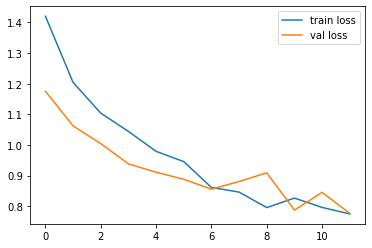

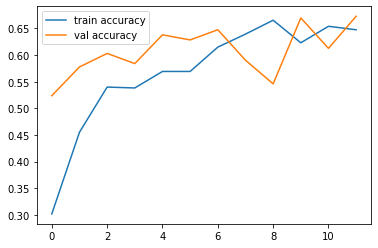

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(model1.history['accuracy'], label='train accuracy')
plt.plot(model1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')